# generating map

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm, ListedColormap


In [2]:
terrain_height = pd.read_csv(r'C:\Users\prade\OneDrive\Documents\Code\TransportFever2\Data\raw\terrain_height.csv')

In [3]:
grid = pd.pivot_table(terrain_height, index='x', columns='y', values='z')
terrain_x = np.array(grid.index)
terrain_y = np.array(grid.columns)
terrain_z = grid.to_numpy()

In [4]:
terrain_x.shape, terrain_y.shape, terrain_z.shape, 

((478,), (478,), (478, 478))

In [5]:
print(terrain_x.min().item(), terrain_y.min().item(), terrain_z.min().item())
print(terrain_x.max().item(), terrain_y.max().item(), terrain_z.max().item() )

-7168 -7168 -64.15
7142 7142 206.7


In [6]:
town_df = pd.read_csv(r'C:\Users\prade\OneDrive\Documents\Code\TransportFever2\Data\raw\town_coord.csv',
                      index_col=False)

In [13]:
def plop_town(df):
    x = df['x'].to_numpy()
    y = df['y'].to_numpy()
    name = df['name'].to_list()

    plt.scatter(x, y, marker='*', color='tab:orange')

    for i, label in enumerate(name):
        plt.annotate(label, (x[i], y[i]),
                    textcoords='offset points',
                    xytext=(4, 3),       # offset from point
                    fontsize=10)

In [8]:
def map(terrain_x, terrain_y, terrain_z):
    bounds = [-65, -20, 0, 2, 70, 150, 210]  # your z breakpoints
    colors = ["#113DCE", "#1badc6", "#e4d236", "#2bbd76", "#a56e08", "#d1e2e8"]

    cmap = ListedColormap(colors)
    norm = BoundaryNorm(bounds, cmap.N)

    plt.contourf(terrain_x, terrain_y, terrain_z, levels=bounds, cmap=cmap, norm=norm)
    plt.colorbar(label='Elevation (m)')

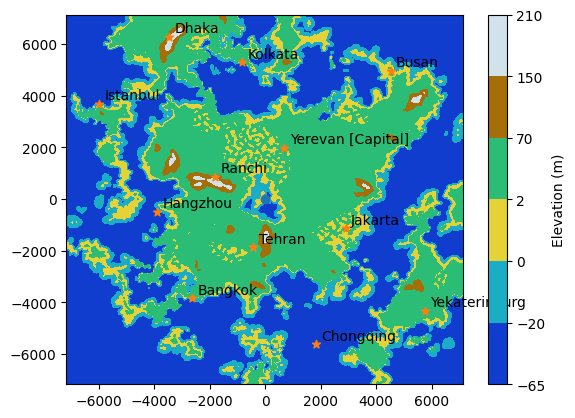

In [ ]:
map(terrain_x, terrain_y, terrain_z)
plop_town(town_df)